<a href="https://colab.research.google.com/github/KC-Night/DS-3001-Scraping-Lab/blob/main/Lab_Scraping_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
! git clone https://github.com/KC-Night/lab_scraping.git

fatal: destination path 'lab_scraping' already exists and is not an empty directory.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

## The Lab:


1. Pick something else on Craigslist besides used cars: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of basic EDA you'd do with it.
2. Get your search results of interest using `requests` and extract data from them using `beautifulSoup`, using code similar to what's above.
3. Wrangle your data into a dataframe and do some basic descriptions and plots. Try to find some interesting relationships or stories to tell about your data.
4. Document all your work as code and markdown blocks in this notebook.

Q1

In [17]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://washingtondc.craigslist.org/search/washington-dc/moa?lat=38.9316&lon=-76.962&search_distance=60#search=2~gallery~0' #cell phones in dc
raw = requests.get(url,headers=header)

# gather price, brand, model
# statistical description, kernel density plot, histogram, bar chart

Q2 + Q3

In [18]:
from bs4 import BeautifulSoup as soup #
bsObj = soup(raw.content,'html.parser')
phone_list = bsObj.find_all(class_="cl-static-search-result")

brand_list = ['apple','pixel','samsung', 'motorola', 'lg']

data = []
for k in range(len(phone_list)):
    title = phone_list[k].find('div', class_='title').get_text().lower()
    price = phone_list[k].find('div', class_='price').get_text()
    link = phone_list[k].find('a', href=True)['href']

    # search for brand in title
    if "iphone" in title or "apple" in title:
        brand = "apple"
    elif "samsung" in title or "galaxy" in title:
        brand = "samsung"
    elif "pixel" in title:
        brand = "google"
    elif "moto" in title or "motorola" in title:
        brand = "motorola"
    elif "lg" in title:
        brand = "lg"
    else:
        brand = "N/A"

    # search for model in title
    match = re.search(r'(iphone\s*\d+\w*|galaxy\s*[a-z]?\d+\w*|samsung\s*[a-z]?\d+\w*|pixel\s*\d+\w*)', title)
    if match:
        model = match.group(0)
    else:
        model = "N/A"

    data.append({
        'title': title,
        'price': price,
        'link': link,
        'brand': brand,
        'model': model
    })

phone_df = pd.DataFrame(data)
phone_df.head()

,title,price,link,brand,model
0,prop display samsung cell phones galaxy s21+ 5...,$40,https://washingtondc.craigslist.org/mld/mob/d/...,samsung,galaxy s21
1,iphone 11 unlock 64gb,$195,https://washingtondc.craigslist.org/nva/mob/d/...,apple,iphone 11
2,iphone 15 pro 256gb natural titanium unlocked,$525,https://washingtondc.craigslist.org/mld/mob/d/...,apple,iphone 15
3,new samsung galaxy s8+ phone case and 2 screen...,$70,https://york.craigslist.org/mob/d/hanover-new-...,samsung,galaxy s8
4,samsung galaxy z flip 7,$350,https://baltimore.craigslist.org/mob/d/catonsv...,samsung,N/A


In [19]:
phone_df = pd.DataFrame(data)
phone_df['price'] = phone_df['price'].str.replace('$','')
phone_df['price'] = phone_df['price'].str.replace(',','')
phone_df['price'] = pd.to_numeric(phone_df['price'],errors='coerce') #change price to numeric
phone_df.to_csv('./lab_scraping/src/craigslist_dc_cellphones.csv') #save in csv
phone_df.head()

,title,price,link,brand,model
0,prop display samsung cell phones galaxy s21+ 5...,40,https://washingtondc.craigslist.org/mld/mob/d/...,samsung,galaxy s21
1,iphone 11 unlock 64gb,195,https://washingtondc.craigslist.org/nva/mob/d/...,apple,iphone 11
2,iphone 15 pro 256gb natural titanium unlocked,525,https://washingtondc.craigslist.org/mld/mob/d/...,apple,iphone 15
3,new samsung galaxy s8+ phone case and 2 screen...,70,https://york.craigslist.org/mob/d/hanover-new-...,samsung,galaxy s8
4,samsung galaxy z flip 7,350,https://baltimore.craigslist.org/mob/d/catonsv...,samsung,N/A


In [20]:
# drop rows with missing data
phone_df = phone_df[(phone_df['brand'] != 'N/A') & (phone_df['model'] != 'N/A')]

phone_df = phone_df.reset_index(drop=True)
phone_df.head()

,title,price,link,brand,model
0,prop display samsung cell phones galaxy s21+ 5...,40,https://washingtondc.craigslist.org/mld/mob/d/...,samsung,galaxy s21
1,iphone 11 unlock 64gb,195,https://washingtondc.craigslist.org/nva/mob/d/...,apple,iphone 11
2,iphone 15 pro 256gb natural titanium unlocked,525,https://washingtondc.craigslist.org/mld/mob/d/...,apple,iphone 15
3,new samsung galaxy s8+ phone case and 2 screen...,70,https://york.craigslist.org/mob/d/hanover-new-...,samsung,galaxy s8
4,apple iphone 16 pro max 256gb - new factory se...,850,https://washingtondc.craigslist.org/nva/mob/d/...,apple,iphone 16


In [21]:
# statistical description of brand and price
phone_df.loc[:,['price','brand']].groupby('brand').describe()

price                                                          
         count        mean         std  min   25%    50%     75%     max
brand                                                                   
apple    150.0  311.900000  334.457163  0.0  60.0  200.0  461.25  1600.0
google    13.0  405.000000  341.997807  5.0  10.0  550.0  600.00   850.0
samsung   42.0  223.047619  261.611512  1.0  42.5  100.0  314.25   899.0

In [22]:
# statistical description of model and price
phone_df.loc[:,['price','model']].groupby('model').describe()

price                                                          \
            count        mean         std    min     25%     50%      75%   
model                                                                       
galaxy 6s     1.0   12.000000         NaN   12.0   12.00    12.0    12.00   
galaxy a03s   2.0   60.000000   14.142136   50.0   55.00    60.0    65.00   
galaxy a13    2.0   75.000000   21.213203   60.0   67.50    75.0    82.50   
galaxy a15    1.0  110.000000         NaN  110.0  110.00   110.0   110.00   
galaxy a16    1.0  100.000000         NaN  100.0  100.00   100.0   100.00   
galaxy a51    1.0  140.000000         NaN  140.0  140.00   140.0   140.00   
galaxy a54    1.0   95.000000         NaN   95.0   95.00    95.0    95.00   
galaxy a71    1.0  175.000000         NaN  175.0  175.00   175.0   175.00   
galaxy j5     1.0   20.000000         NaN   20.0   20.00    20.0    20.00   
galaxy s10e   2.0  100.000000    0.000000  100.0  100.00   100.0   100.00   
galaxy s21    2.0  145.000000  148.492424   40.0   92.50   145.0   197.50   
galaxy s22    5.0  179.600000  163.808730   20.0  100.00   133.0   195.00   
galaxy s23    2.0  334.500000   21.920310  319.0  326.75   334.5   342.25   
galaxy s24    5.0   82.200000  177.107877    1.0    1.00     5.0     5.00   
galaxy s25    4.0  724.500000  283.960678  300.0  711.75   849.5   862.25   
galaxy s7     2.0   32.500000   38.890873    5.0   18.75    32.5    46.25   
galaxy s8     1.0   70.000000         NaN   70.0   70.00    70.0    70.00   
iphone  7     1.0   50.000000         NaN   50.0   50.00    50.0    50.00   
iphone 11    11.0  143.363636  101.395535    9.0   74.00   100.0   220.00   
iphone 12    26.0  204.923077  116.429867   10.0  117.00   194.5   298.75   
iphone 13    22.0  268.954545  183.256125   10.0  133.00   265.0   397.50   
iphone 14    23.0  275.565217  219.190002    0.0   70.00   216.0   475.00   
iphone 15    13.0  526.923077  264.072106  125.0  216.00   550.0   699.00   
iphone 16    18.0  579.111111  395.353288   20.0  287.50   607.5   835.50   
iphone 16e    1.0  400.000000         NaN  400.0  400.00   400.0   400.00   
iphone 17     9.0  885.111111  677.110671    1.0   60.00  1100.0  1450.00   
iphone 4      1.0   20.000000         NaN   20.0   20.00    20.0    20.00   
iphone 5      3.0   33.333333   15.275252   20.0   25.00    30.0    40.00   
iphone 5c     1.0    0.000000         NaN    0.0    0.00     0.0     0.00   
iphone 5s     1.0   50.000000         NaN   50.0   50.00    50.0    50.00   
iphone 6      7.0   71.714286   51.918893    7.0   40.00    50.0   107.50   
iphone 6s     5.0   79.000000   43.789268   20.0   45.00   105.0   105.00   
iphone 7      5.0   38.600000   57.855855    5.0    5.00    10.0    33.00   
iphone 8      2.0  100.000000  120.208153   15.0   57.50   100.0   142.50   
iphone16      1.0  475.000000         NaN  475.0  475.00   475.0   475.00   
pixel 10      2.0  850.000000    0.000000  850.0  850.00   850.0   850.00   
pixel 3       1.0  115.000000         NaN  115.0  115.00   115.0   115.00   
pixel 4a      1.0   10.000000         NaN   10.0   10.00    10.0    10.00   
pixel 6a      1.0   10.000000         NaN   10.0   10.00    10.0    10.00   
pixel 7       1.0    5.000000         NaN    5.0    5.00     5.0     5.00   
pixel 8       1.0    5.000000         NaN    5.0    5.00     5.0     5.00   
pixel 9       5.0  624.000000  100.647901  550.0  570.00   600.0   600.00   
pixel 9a      1.0  300.000000         NaN  300.0  300.00   300.0   300.00   
samsung 15w   1.0   30.000000         NaN   30.0   30.00    30.0    30.00   
samsung a35   1.0  500.000000         NaN  500.0  500.00   500.0   500.00   
samsung a9    1.0  150.000000         NaN  150.0  150.00   150.0   150.00   
samsung s22   1.0  200.000000         NaN  200.0  200.00   200.0   200.00   
samsung s24   1.0  790.000000         NaN  790.0  790.00   790.0   790.00   
samsung s25   2.0  617.500000   81.317280  560.0  588.75   617.5   646.25   
samsung 

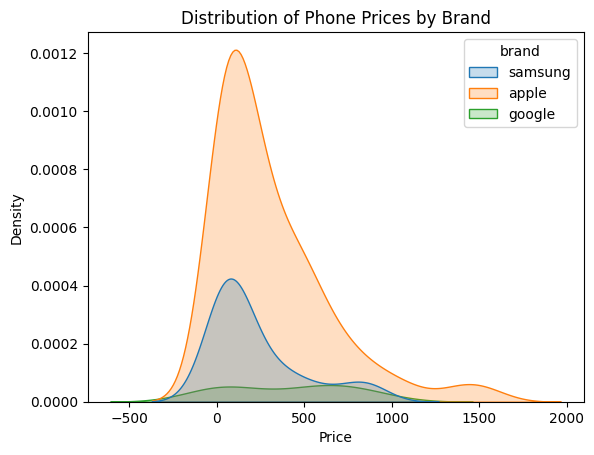

In [23]:
sns.kdeplot(data=phone_df, x='price', hue='brand', fill=True)
plt.title('Distribution of Phone Prices by Brand')
plt.xlabel('Price')
plt.show()
# There are more apple products being sold compared to samsung and google products, and apple products tend to have a wider range of prices.
# However the average prices of the products is around the same price

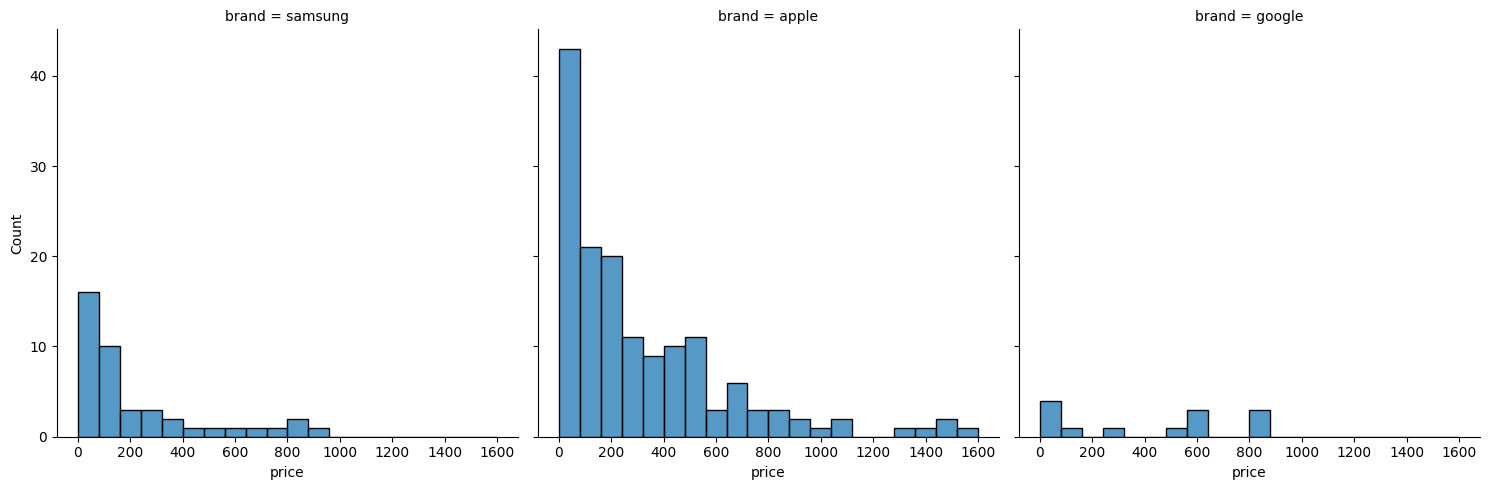

In [24]:
sns.displot(data=phone_df, x="price", col="brand", bins=20)
plt.show()
# Apple products tend to be priced around the $0-200 range,indicating people on craigslist may be selling smaller apple products such as air pods or apple pencils, or older/ broken apple products
# Samsung seems to follow the same trend as Apple, just with fewer products
# The brand with the fewest products on craigslist is Google, most likely because Google products tend to be less popular than Apple or Samsung products

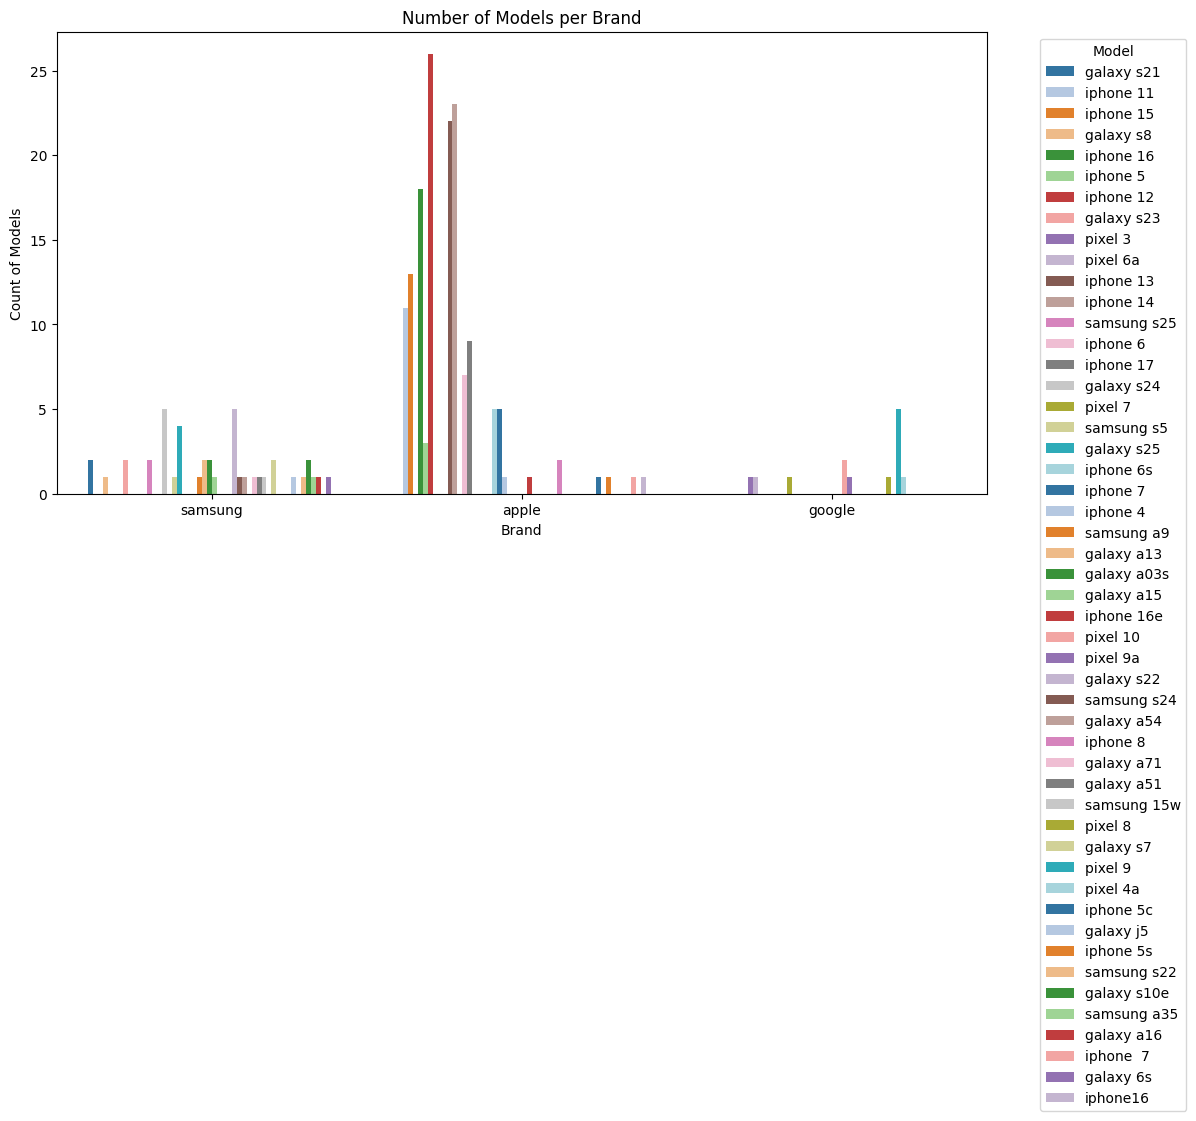

In [25]:
plt.figure(figsize=(12,6))

palette = sns.color_palette("tab20", n_colors=phone_df['model'].nunique())

sns.countplot(
    data=phone_df,
    x="brand",
    hue="model",
    palette=palette
)


plt.title("Number of Models per Brand")
plt.xlabel("Brand")
plt.ylabel("Count of Models")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# The model with the most sales for Samsung is the galaxy s23
# The model with the most sales for Apple is the iphone 13. This is also the model with the most sales in general
# The model with the most sales for Google is the pixel 9
# There are more older models of iphones being sold on craigslist, while Samsung and Google have more recent models of phones being sold